# Formation Generation

This notebook focuses on methods for generating 2D formations. A computer vision based approach and manual approach are presented.

## Edge Detection based Approach

In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from PIL import ImageFont, ImageDraw, Image

%matplotlib inline

def find_corners(gray, erode=8, dilate=10):

    plt.figure()
    plt.imshow(gray, cmap='gray')

    dst = cv2.erode(gray,np.ones((erode,erode),np.uint8))
    plt.figure()
    plt.imshow(dst, cmap='gray')

    # find Harris corners
    dst = cv2.cornerHarris(dst,2,3,0.04)

    plt.figure()
    plt.imshow(dst)

    dst = cv2.dilate(dst,np.ones((dilate,dilate),np.uint8))
    ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
    dst = np.uint8(dst)

    # find centroids
    ret, labels, stats, centroids = cv2.connectedComponentsWithStats(dst)

    # define the criteria to stop and refine the corners
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.001)
    corners = cv2.cornerSubPix(gray,np.float32(centroids),(5,5),(-1,-1),criteria)

    # Now draw them
    res = np.hstack((centroids,corners))
    res = np.int0(res)
    img = np.zeros_like(dst)
    #img[:, :] = 255
    #img[res[:,1],res[:,0]]=[0,0,255]
    #img[res[:,3],res[:,2]] = [0,0,0]

    plt.figure()
    plt.imshow(dst)
    #plt.plot(res[:,2],res[:,3], 'bo')
    plt.plot(res[:,0],res[:,1], 'rx')

In [2]:
def draw_text(text):
    # Load image in OpenCV  
    image = np.zeros((200, 500), dtype=np.uint8)

    # Convert the image to RGB (OpenCV uses BGR)  
    cv2_im_rgb = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)  

    # Pass the image to PIL 
    pil_im = Image.fromarray(cv2_im_rgb)  

    draw = ImageDraw.Draw(pil_im)  
    # use a truetype font  
    font = ImageFont.truetype("data/Straight.ttf", 100)  

    # Draw the text  
    draw.text((10, 0), text, font=font)  

    # Get back the image to OpenCV  
    return cv2.cvtColor(np.array(pil_im), cv2.COLOR_RGB2GRAY)  

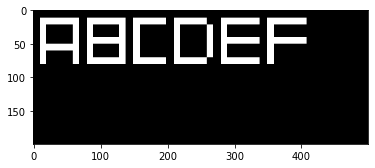

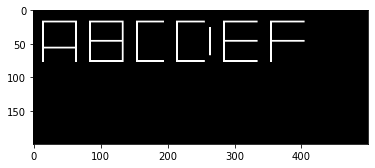

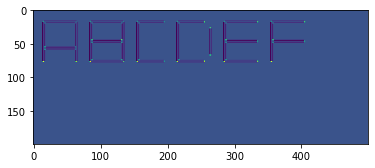

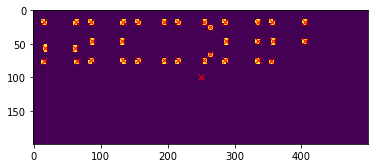

In [3]:
img_text = draw_text("ABCDEF")
find_corners(img_text, 8, 5)

## Manual Approach

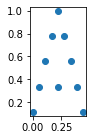

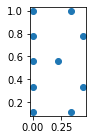

In [4]:
EMPTY = [
    '---------',
    '---------',
    '---------',
    '---------',
    '---------',
    '---------',
    '---------',
    '---------',
    '---------'
]

A = [
    '----0----',
    '---------',
    '---0-0---',
    '---------',
    '--0---0--',
    '---------',
    '-0--0--0-',
    '---------',
    '0-------0'
]

B = [
    '0-----0--',
    '---------',
    '0-------0',
    '---------',
    '0---0----',
    '---------',
    '0-------0',
    '---------',
    '0-----0--'
]

def letter_to_coord(letter):
    points = []
    n_rows = len(letter)
    n_cols = len(letter[0])
    for row, row_data in enumerate(letter):
        for col in range(len(row_data)):
            col_data = row_data[col]
            if col_data == '0':
                points.append([
                    0.5*float(col)/n_cols,
                    1 -float(row)/n_rows])
    return np.array(points)

plt.figure(figsize=(1, 2))
coord = letter_to_coord(A)
plt.plot(coord[:, 0], coord[:, 1], 'o')
plt.axis('equal');

plt.figure(figsize=(1, 2))
coord = letter_to_coord(B)
plt.plot(coord[:, 0], coord[:, 1], 'o')
plt.axis('equal');

# Edge Detection to Create Formation for Image

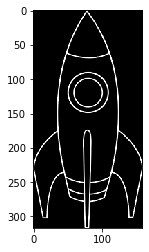

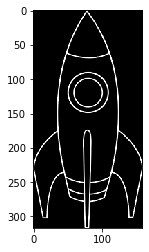

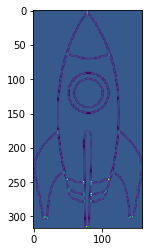

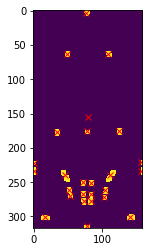

In [5]:
img_rocket = cv2.imread('data/rocket.png', 0)
find_corners(255 - img_rocket, 1, 5)

This doesn't look great. We might have better luck with a simpler image, or trying to disperse the points using a grid based aproach.